<br>

####   hw5pr2digits_modeler 
+ digits clasification via decision trees and random forests...


In [22]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

In [23]:
# let's read in our flower data...
# 
# births_cleaned.csv and births_cleaner.ipynb should be in this folder
# 
filename = 'digits_cleaned.csv'
df_tidy = pd.read_csv(filename)      # encoding = "utf-8", "latin1"
print(f"{filename} : file read into a pandas dataframe.")

digits_cleaned.csv : file read into a pandas dataframe.


In [24]:
#
# different version vary on how to see all rows (adapt to suit your system!)
#
print(f"df_tidy.shape is {df_tidy.shape}\n")
df_tidy.info()  # prints column information

# let's print the whole dataframe, too  (adapt # of lines, as desired)
# pd.options.display.max_rows = 150   # None for no limit; default: 10
pd.options.display.min_rows = 150   # None for no limit; default: 10
# pd.options.display.max_rows = 10   # None for no limit; default: 10
# pd.options.display.min_rows = 10   # None for no limit; default: 10
df_tidy

df_tidy.shape is (1768, 65)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1768 entries, 0 to 1767
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   pix0          1768 non-null   int64
 1   pix1          1768 non-null   int64
 2   pix2          1768 non-null   int64
 3   pix3          1768 non-null   int64
 4   pix4          1768 non-null   int64
 5   pix5          1768 non-null   int64
 6   pix6          1768 non-null   int64
 7   pix7          1768 non-null   int64
 8   pix8          1768 non-null   int64
 9   pix9          1768 non-null   int64
 10  pix10         1768 non-null   int64
 11  pix11         1768 non-null   int64
 12  pix12         1768 non-null   int64
 13  pix13         1768 non-null   int64
 14  pix14         1768 non-null   int64
 15  pix15         1768 non-null   int64
 16  pix16         1768 non-null   int64
 17  pix17         1768 non-null   int64
 18  pix18         1768 non-null   int64
 19

pix0  pix1  pix2  pix3  pix4  pix5  pix6  pix7  pix8  pix9  ...  pix55  \
0        0     0     9    14     8     1     0     0     0     0  ...      0   
1        0     0    11    12     0     0     0     0     0     2  ...      0   
2        0     0     1     9    15    11     0     0     0     0  ...      0   
3        0     0     0     0    14    13     1     0     0     0  ...      0   
4        0     0     5    12     1     0     0     0     0     0  ...      2   
5        0     2     9    15    14     9     3     0     0     4  ...      0   
6        0     0     0     8    15     1     0     0     0     0  ...      0   
7        0     5    12    13    16    16     2     0     0    11  ...      0   
8        0     0     0     8    15     1     0     0     0     0  ...      2   
9        0     0     1     8    15    10     0     0     0     3  ...      0   
10       0     0    10     7    13     9     0     0     0     0  ...      0   
11       0     0     6    14     4     0     0     0     0     0  ...      2   
12       0     0     0     2    16    16     2     0     0     0  ...      0   
13       0     0     8    16     5     0     0     0     0     1  ...      0   
14       0     1     8    12    15    14     4     0     0     3  ...      0   
15       0     0     0     0    12     2     0     0     0     0  ...      0   
16       0     0    12     8     8     7     0     0     0     3  ...      0   
17       0     0     1    13    14     3     0     0     0     0  ...      0   
18       0     0     0     8    14    14     2     0     0     0  ...      0   
19       0     0    10    11     4     0     0     0     0     0  ...      0   
20       0     0     0     9    15    12     0     0     0     0  ...      0   
21       0     0     9    16    16    16     5     0     0     1  ...      0   
22       0     0     9    16    13     6     0     0     0     0  ...      0   
23       0     1    15     4     0     0     0     0     0     2  ...      0   
24       0     0     0     1    11     9     0     0     0     0  ...      0   
25       0     0     2    15    13     3     0     0     0     0  ...      0   
26       0     0     1    15    13     1     0     0     0     0  ...      0   
27       0     0     0     5    14    12     2     0     0     0  ...      0   
28       0     0     0     3    15    10     1     0     0     0  ...      0   
29       0     0     4     8    16     5     0     0     0     0  ...      0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
1738     0     0     0     2    16     1     0     0     0     0  ...      0   
1739     0     0     5    16    10     0     0     0     0     0  ...      0   
1740     0     0     9    12    14     6     0     0     0     0  ...      0   
1741     0     2    10    12    16     8     0     0     0     4  ...      0   
1742     0     0     0     6    12     6     0     0     0     0  ...      0   
1743     0     0     5    14    11     8     0     0     0     4  ...      0   
1744     0     0     2    13    10     0     0     0     0     0  ...      0   
1745     0     0     6    12    12     6     0     0     0     0  ...      0   
1746     0     0     6    16    16     3     0     0     0     0  ...      0   
1747     0     0    12    16    16     7     0     0     0     3  ...      0   
1748     0     0     0     2    14     0     0     0     0     0  ...      0   
1749     0     0     0     1    13     8     0     0     0     0  ...      0   
1750     0     0     3    10    16    16     4     0     0     0  ...      0   
1751     0     3    14    15     6     0     0     0     0     7  ...      0   
1752     0     0    10    16    14     5     0     0     0     2  ...      0   
1753     0     1    10    13     2     0     0     0     0    10  ...      0   
1754     0     0    15    13     1     0     0     0     0     0  ...      0   
1755     0     0     1    10    14    13     1     0     0     0  ...      0   
1756  

In [25]:
#
# once we have all the columns we want, let's create an index of their names...

#
# Let's make sure we have all of our helpful variables in one place 
#       To be adapted if we drop/add more columns...
#

#
# let's keep our column names in variables, for reference
#


COLUMNS = df_tidy.columns            # "list" of columns
print(f"COLUMNS is {COLUMNS}\n")  
  # It's a "pandas" list, called an Index
  # use it just as a Python list of strings:
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

# let's create a dictionary to look up any column index by name
PIXELS = []
DIGITS = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
DIGITS_INDEX = {'0':0, '1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9}
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
    PIXELS.append(COLUMNS[i])
PIXELS = PIXELS[:-1]

print(f"COL_INDEX is {COL_INDEX}\n\n")
print(f"PIXELS is {PIXELS}\n\n")

for name in DIGITS:
    print(f"{name} maps to {DIGITS_INDEX[name]}")


COLUMNS is Index(['pix0', 'pix1', 'pix2', 'pix3', 'pix4', 'pix5', 'pix6', 'pix7', 'pix8',
       'pix9', 'pix10', 'pix11', 'pix12', 'pix13', 'pix14', 'pix15', 'pix16',
       'pix17', 'pix18', 'pix19', 'pix20', 'pix21', 'pix22', 'pix23', 'pix24',
       'pix25', 'pix26', 'pix27', 'pix28', 'pix29', 'pix30', 'pix31', 'pix32',
       'pix33', 'pix34', 'pix35', 'pix36', 'pix37', 'pix38', 'pix39', 'pix40',
       'pix41', 'pix42', 'pix43', 'pix44', 'pix45', 'pix46', 'pix47', 'pix48',
       'pix49', 'pix50', 'pix51', 'pix52', 'pix53', 'pix54', 'pix55', 'pix56',
       'pix57', 'pix58', 'pix59', 'pix60', 'pix61', 'pix62', 'pix63',
       'actual_digit'],
      dtype='object')

COLUMNS[0] is pix0

COL_INDEX is {'pix0': 0, 'pix1': 1, 'pix2': 2, 'pix3': 3, 'pix4': 4, 'pix5': 5, 'pix6': 6, 'pix7': 7, 'pix8': 8, 'pix9': 9, 'pix10': 10, 'pix11': 11, 'pix12': 12, 'pix13': 13, 'pix14': 14, 'pix15': 15, 'pix16': 16, 'pix17': 17, 'pix18': 18, 'pix19': 19, 'pix20': 20, 'pix21': 21, 'pix22': 22, 'pix23'

In [26]:
#
# let's convert our dataframe to a numpy array, named A
#
df_model1 = df_tidy             # Just to make life easier for me...
A = df_model1.to_numpy()   
print(A)

[[ 0  0  9 ...  1  0  8]
 [ 0  0 11 ...  0  0  9]
 [ 0  0  1 ...  0  0  0]
 ...
 [ 0  0  1 ...  0  0  8]
 [ 0  0  2 ...  0  0  9]
 [ 0  0 10 ...  1  0  8]]


In [27]:
#
# let's make sure it's all floating-point
#
A = A.astype('float64')  # so many:  www.tutorialspoint.com/numpy/numpy_data_types.htm
print(A)

[[ 0.  0.  9. ...  1.  0.  8.]
 [ 0.  0. 11. ...  0.  0.  9.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  1. ...  0.  0.  8.]
 [ 0.  0.  2. ...  0.  0.  9.]
 [ 0.  0. 10. ...  1.  0.  8.]]


In [28]:
#
# nice to have NUM_ROWS and NUM_COLS around
#
NUM_ROWS, NUM_COLS = A.shape
print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")


The dataset has 1768 rows and 65 cols


In [29]:
# let's use all our variables, to reinforce that we have
# (1) their names...
# (2) access and control over each...

# choose a row index, n:
n = 42
print(f"Digit #{n} is {A[n]}")

for i in range(len(COLUMNS)):
    colname = COLUMNS[i]
    value = A[n][i]
    print(f"  Its {colname} is {value}")

digit_index = COL_INDEX['actual_digit']
digit_num = int(round(A[n][digit_index]))


Digit #42 is [ 0.  0.  0. 10. 11.  0.  0.  0.  0.  0.  9. 16.  6.  0.  0.  0.  0.  0.
 15. 13.  0.  0.  0.  0.  0.  0. 14. 10.  0.  0.  0.  0.  0.  1. 15. 12.
  8.  2.  0.  0.  0.  0. 12. 16. 16. 16. 10.  1.  0.  0.  7. 16. 12. 12.
 16.  4.  0.  0.  0.  9. 15. 12.  5.  0.  6.]
  Its pix0 is 0.0
  Its pix1 is 0.0
  Its pix2 is 0.0
  Its pix3 is 10.0
  Its pix4 is 11.0
  Its pix5 is 0.0
  Its pix6 is 0.0
  Its pix7 is 0.0
  Its pix8 is 0.0
  Its pix9 is 0.0
  Its pix10 is 9.0
  Its pix11 is 16.0
  Its pix12 is 6.0
  Its pix13 is 0.0
  Its pix14 is 0.0
  Its pix15 is 0.0
  Its pix16 is 0.0
  Its pix17 is 0.0
  Its pix18 is 15.0
  Its pix19 is 13.0
  Its pix20 is 0.0
  Its pix21 is 0.0
  Its pix22 is 0.0
  Its pix23 is 0.0
  Its pix24 is 0.0
  Its pix25 is 0.0
  Its pix26 is 14.0
  Its pix27 is 10.0
  Its pix28 is 0.0
  Its pix29 is 0.0
  Its pix30 is 0.0
  Its pix31 is 0.0
  Its pix32 is 0.0
  Its pix33 is 1.0
  Its pix34 is 15.0
  Its pix35 is 12.0
  Its pix36 is 8.0
  Its pix37 is 2.0
 

In [30]:
print("+++ Start of data definitions +++\n")

#
# we could do this at the data-frame level, too!
#

X_all = A[:,0:64]  # X (features) ... is all rows, columns 0, 1, 2, ..., 63
y_all = A[:,64]    # y (labels) ... is all rows, column 64 only

print(f"y_all (just the labels/species)   are \n {y_all}")
print(f"X_all (just the features, first few rows) are \n {X_all[0:5]}")

+++ Start of data definitions +++

y_all (just the labels/species)   are 
 [8. 9. 0. ... 8. 9. 8.]
X_all (just the features, first few rows) are 
 [[ 0.  0.  9. 14.  8.  1.  0.  0.  0.  0. 12. 14. 14. 12.  0.  0.  0.  0.
   9. 10.  0. 15.  4.  0.  0.  0.  3. 16. 12. 14.  2.  0.  0.  0.  4. 16.
  16.  2.  0.  0.  0.  3. 16.  8. 10. 13.  2.  0.  0.  1. 15.  1.  3. 16.
   8.  0.  0.  0. 11. 16. 15. 11.  1.  0.]
 [ 0.  0. 11. 12.  0.  0.  0.  0.  0.  2. 16. 16. 16. 13.  0.  0.  0.  3.
  16. 12. 10. 14.  0.  0.  0.  1. 16.  1. 12. 15.  0.  0.  0.  0. 13. 16.
   9. 15.  2.  0.  0.  0.  0.  3.  0.  9. 11.  0.  0.  0.  0.  0.  9. 15.
   4.  0.  0.  0.  9. 12. 13.  3.  0.  0.]
 [ 0.  0.  1.  9. 15. 11.  0.  0.  0.  0. 11. 16.  8. 14.  6.  0.  0.  2.
  16. 10.  0.  9.  9.  0.  0.  1. 16.  4.  0.  8.  8.  0.  0.  4. 16.  4.
   0.  8.  8.  0.  0.  1. 16.  5.  1. 11.  3.  0.  0.  0. 12. 12. 10. 10.
   0.  0.  0.  0.  1. 10. 13.  3.  0.  0.]
 [ 0.  0.  0.  0. 14. 13.  1.  0.  0.  0.  0.  5. 16. 16. 

In [31]:
#
# we scramble the data, to remove (potential) dependence on its ordering: 
# 
indices = np.random.permutation(len(y_all))  # indices is a permutation-list
# print(indices)

# we scramble both X and y, necessarily with the same permutation
X_permed = X_all[indices]              # we apply the _same_ permutation to each!
y_permed = y_all[indices]              # again...
print(f"The scrambled labels/species are \n {y_permed}")
print(f"The corresponding data rows are \n {X_permed[0:5]}")

The scrambled labels/species are 
 [2. 1. 1. ... 3. 2. 7.]
The corresponding data rows are 
 [[ 0.  0.  0.  0.  9. 13.  0.  0.  0.  0.  0.  2. 16. 16.  1.  0.  0.  0.
   0.  5.  9. 15.  0.  0.  0.  0.  0.  0.  5. 14.  0.  0.  0.  0.  0.  3.
  15.  7.  0.  0.  0.  7. 16. 16. 11.  0.  0.  0.  0.  0. 11. 14. 16.  7.
   3.  0.  0.  0.  0.  0.  9. 15.  9.  0.]
 [ 0.  0.  3. 13. 10.  1.  0.  0.  0.  0.  3. 16. 16.  4.  0.  0.  0.  0.
   1. 16. 16.  2.  0.  0.  0.  0.  6. 16. 16.  1.  0.  0.  0.  0.  4. 16.
  16.  1.  0.  0.  0.  0.  4. 16. 16.  3.  0.  0.  0.  0.  7. 16. 16.  0.
   0.  0.  0.  0.  2. 14. 16.  5.  0.  0.]
 [ 0.  0.  3. 15.  4.  0.  0.  0.  0.  0.  0. 15. 11.  0.  0.  0.  0.  0.
   0. 15. 16.  2.  0.  0.  0.  0.  0. 14. 16.  8.  0.  0.  0.  0.  0.  7.
  13. 14.  0.  0.  0.  0.  0.  0.  4. 16.  4.  0.  0.  0.  3.  9. 13. 16.
  12.  5.  0.  0.  3. 15. 16. 16. 16. 16.]
 [ 0.  2. 11. 16. 15.  2.  0.  0.  0. 12. 16. 15. 16.  4.  0.  0.  0.  2.
   3.  2. 16.  4.  0.  0.  0.  0.  0. 

In [32]:
#
# We next separate into test data and training data ... 
#    + We will train on the training data...
#    + We will _not_ look at the testing data to build the model
#
# Then, afterward, we will test on the testing data -- and see how well we do!
#

#
# a common convention:  train on 80%, test on 20%    Let's define the TEST_PERCENT
#

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_permed, y_permed, test_size=0.2, random_state=42)

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )

print(f"Held-out data... (testing data: {len(y_test)})")
print(f"y_test: {y_test}\n")
print(f"X_test (few rows): {X_test[0:5,:]}")  # 5 rows
print()
print(f"Data used for modeling... (training data: {len(y_train)})")
print(f"y_train: {y_train}\n")
print(f"X_train (few rows): {X_train[0:5,:]}")  # 5 rows

training with 1414 rows;  testing with 354 rows

Held-out data... (testing data: 354)
y_test: [1. 0. 0. 7. 3. 5. 2. 5. 3. 3. 5. 5. 2. 5. 2. 7. 1. 2. 0. 9. 0. 5. 0. 4.
 5. 1. 6. 6. 2. 8. 6. 6. 8. 9. 0. 5. 7. 2. 0. 5. 9. 3. 6. 9. 2. 9. 7. 3.
 5. 5. 1. 2. 6. 5. 8. 4. 3. 7. 8. 5. 8. 7. 2. 8. 3. 5. 1. 9. 0. 4. 4. 8.
 2. 7. 4. 2. 5. 1. 9. 0. 9. 3. 4. 5. 2. 2. 4. 9. 1. 6. 5. 0. 7. 0. 2. 7.
 6. 9. 6. 6. 1. 0. 1. 2. 7. 6. 7. 9. 6. 6. 7. 5. 2. 4. 9. 3. 3. 4. 2. 1.
 9. 8. 2. 3. 1. 9. 9. 6. 9. 2. 9. 3. 9. 4. 0. 1. 8. 2. 2. 9. 6. 5. 6. 4.
 5. 9. 9. 6. 0. 7. 0. 6. 9. 2. 1. 2. 9. 4. 5. 7. 8. 1. 8. 5. 7. 0. 7. 8.
 8. 1. 0. 6. 8. 4. 2. 4. 7. 3. 6. 2. 5. 5. 5. 3. 2. 2. 8. 5. 4. 4. 5. 1.
 9. 4. 6. 3. 0. 3. 0. 3. 5. 2. 6. 7. 9. 3. 2. 6. 2. 0. 2. 6. 8. 8. 7. 9.
 3. 6. 8. 0. 1. 7. 9. 1. 4. 0. 8. 5. 6. 4. 2. 6. 0. 5. 9. 6. 0. 1. 7. 1.
 5. 2. 2. 2. 9. 6. 6. 5. 7. 2. 5. 5. 3. 5. 5. 6. 3. 5. 3. 9. 8. 0. 9. 1.
 2. 8. 3. 8. 9. 2. 6. 8. 7. 0. 2. 9. 9. 4. 0. 9. 3. 0. 8. 8. 7. 9. 6. 4.
 0. 6. 8. 0. 0. 8. 7. 1. 8. 3.

In [44]:
#
# +++ This is the "Model-building and Model-training Cell"
#       
# Create a DT model and train it! 
#
from sklearn import tree      # for decision trees

best_depth = 4   # we don't know what depth to use, so let's guess 1
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)

# Let's train the model.   It's this one line:
dtree_model.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth) 

Created and trained a DT classifier with max depth = 4


In [45]:
#
# +++ This cell will "Model-testing Cell"
#
# Now, let's see how well our model does on our "held-out data" (the testing data)
#

# We run our test set:

# the function knn_model.predict is the instantiation of our model
# it's what runs the k-nearest-neighbors algorithm:
predicted_labels = dtree_model.predict(X_test)   
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

Predicted labels: [2. 0. 0. 7. 3. 2. 2. 3. 3. 3. 4. 3. 2. 4. 2. 2. 2. 2. 0. 3. 0. 7. 0. 2.
 3. 2. 2. 2. 2. 2. 2. 6. 2. 3. 0. 3. 2. 2. 0. 2. 3. 3. 2. 3. 2. 9. 2. 3.
 5. 4. 2. 2. 6. 3. 2. 7. 3. 7. 2. 5. 2. 2. 3. 2. 3. 3. 2. 3. 0. 4. 4. 2.
 2. 7. 4. 2. 2. 2. 9. 0. 3. 3. 4. 4. 2. 2. 4. 3. 2. 2. 2. 0. 7. 0. 3. 2.
 2. 9. 6. 2. 3. 0. 2. 2. 2. 6. 4. 9. 2. 6. 2. 5. 2. 4. 3. 3. 3. 4. 2. 2.
 3. 2. 2. 3. 2. 3. 2. 2. 3. 2. 2. 3. 3. 4. 5. 3. 2. 2. 2. 3. 2. 5. 2. 4.
 3. 3. 3. 2. 0. 7. 4. 5. 3. 2. 2. 2. 3. 4. 2. 3. 5. 4. 2. 3. 2. 0. 7. 2.
 2. 2. 0. 2. 3. 4. 2. 4. 7. 3. 6. 2. 2. 5. 5. 3. 7. 2. 2. 4. 4. 7. 2. 2.
 9. 4. 6. 3. 0. 3. 0. 3. 3. 3. 2. 2. 3. 3. 2. 2. 2. 0. 2. 2. 2. 2. 7. 3.
 3. 6. 2. 0. 3. 7. 3. 4. 7. 0. 2. 3. 6. 4. 2. 6. 0. 3. 3. 6. 5. 3. 2. 3.
 2. 2. 2. 2. 3. 4. 2. 5. 2. 2. 5. 3. 2. 2. 3. 2. 3. 3. 7. 9. 4. 0. 7. 2.
 2. 2. 3. 2. 9. 2. 6. 2. 2. 0. 2. 9. 3. 4. 2. 3. 3. 0. 2. 3. 2. 3. 6. 4.
 0. 6. 2. 0. 0. 2. 7. 2. 2. 3. 2. 6. 4. 6. 4. 2. 7. 2. 4. 9. 2. 2. 7. 7.
 7. 2. 6. 4. 3. 5. 0. 2. 2. 2. 2.

In [46]:
#
# Let's print these more helpfully, in a vertical table
#

def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0
    
    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error 
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            num_correct += 1  # and we count a match!

        print(f"row {i:>3d} : {p:>12d} {a:<12d}   {result}")   

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

# let's try it out!
compare_labels(predicted_labels,actual_labels)


row   0 :            2 1              incorrect
row   1 :            0 0              
row   2 :            0 0              
row   3 :            7 7              
row   4 :            3 3              
row   5 :            2 5              incorrect
row   6 :            2 2              
row   7 :            3 5              incorrect
row   8 :            3 3              
row   9 :            3 3              
row  10 :            4 5              incorrect
row  11 :            3 5              incorrect
row  12 :            2 2              
row  13 :            4 5              incorrect
row  14 :            2 2              
row  15 :            2 7              incorrect
row  16 :            2 1              incorrect
row  17 :            2 2              
row  18 :            0 0              
row  19 :            3 9              incorrect
row  20 :            0 0              
row  21 :            7 5              incorrect
row  22 :            0 0              
row  23 :    

170

In [47]:
#
# Now, let's see the tree!
#

filename = 'tree_data.gv'    # sometimes .dot is used, instead of .gv

tree.export_graphviz(dtree_model, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names
                            filled=True,              
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=DIGITS,       
                            leaves_parallel=True )   

print(f"file {filename} written. Try pasting its contents to  http://viz-js.com/\n")

with open(filename, "r") as f:
    all_file_text = f.read()
    print(all_file_text)

file tree_data.gv written. Try pasting its contents to  http://viz-js.com/

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="pix36 <= 0.5\ngini = 0.9\nsamples = 1414\nvalue = [135, 149, 130, 152, 154, 133, 139, 146, 140, 136]\nclass = 4", fillcolor="#ffffff"] ;
1 [label="pix28 <= 2.5\ngini = 0.557\nsamples = 214\nvalue = [133, 0, 4, 1, 4, 21, 4, 0, 1, 46]\nclass = 0", fillcolor="#f2be98"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="pix21 <= 0.5\ngini = 0.18\nsamples = 146\nvalue = [132, 0, 2, 0, 4, 5, 3, 0, 0, 0]\nclass = 0", fillcolor="#e88e4d"] ;
1 -> 2 ;
3 [label="pix6 <= 1.0\ngini = 0.698\nsamples = 13\nvalue = [0, 0, 1, 0, 4, 5, 3, 0, 0, 0]\nclass = 5", fillcolor="#e9f4fc"] ;
2 -> 3 ;
4 [label="gini = 0.594\nsamples = 8\nvalue = [0, 0, 1, 0, 4, 0, 3, 0, 0, 0]\nclass = 4", fillcolor="#d7faf3"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsample

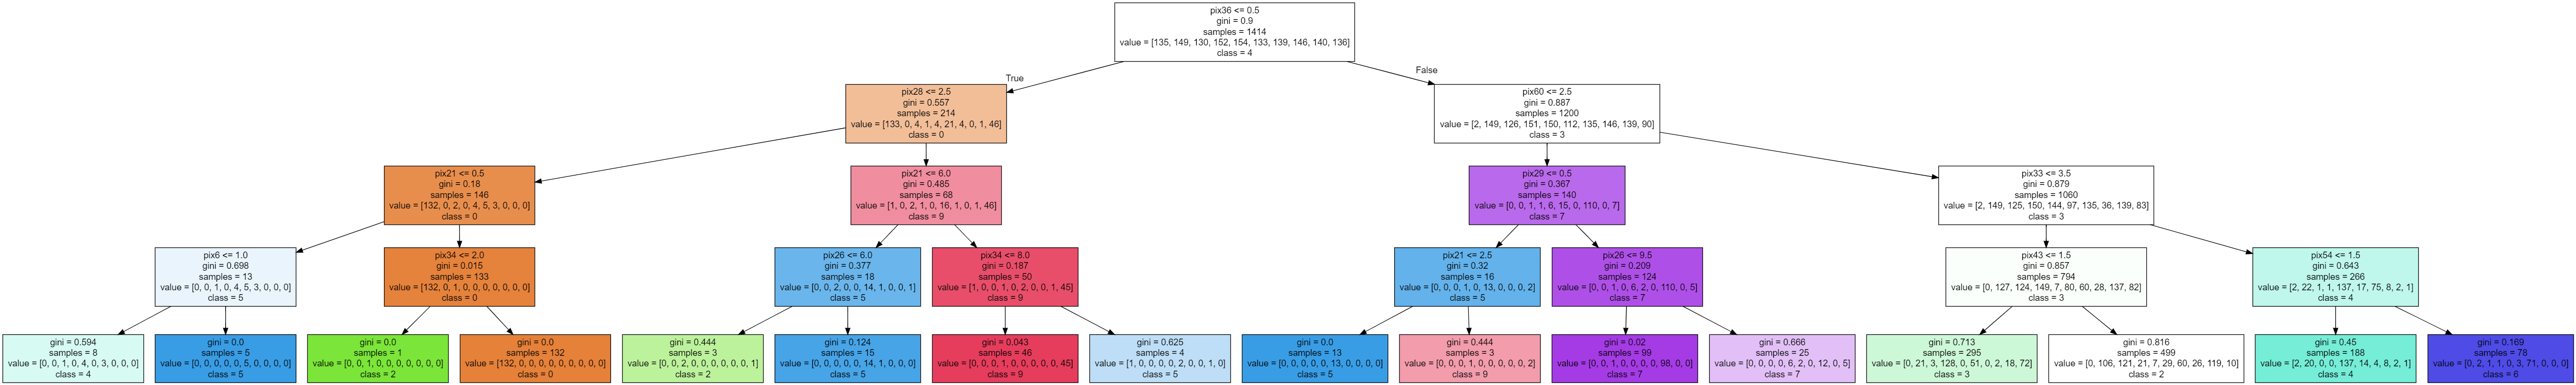

In [48]:
from IPython import display
display.Image("./digits_trees1.png", width=1200, height=200)  # be sure it has the right name, and is in this directory...

In [49]:
#
# To compare different tree-depths, we use cross validation
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

best_d = 1
best_accuracy = 0.0

for d in range(1,11):
    cv_model = tree.DecisionTreeClassifier(max_depth=d)   # for each depth, d
    cv_scores = cross_val_score( cv_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
    # print(cv_scores)  # we usually don't want to see the five individual scores 
    average_cv_accuracy = cv_scores.mean()  # more likely, only their average
    print(f"depth: {d:2d}  cv accuracy: {average_cv_accuracy:7.4f}")
    
    if average_cv_accuracy > best_accuracy:
        best_accuracy = average_cv_accuracy
        best_d = d

    
    
# assign best value of d to best_depth
best_depth = best_d   # may have to hand-tune this, depending on what happens...
print()
print(f"best_depth = {best_depth} with acc: {best_accuracy} is our underfitting/overfitting balance.")  

depth:  1  cv accuracy:  0.2008
depth:  2  cv accuracy:  0.3105
depth:  3  cv accuracy:  0.4201
depth:  4  cv accuracy:  0.5460
depth:  5  cv accuracy:  0.6273
depth:  6  cv accuracy:  0.7341
depth:  7  cv accuracy:  0.7857
depth:  8  cv accuracy:  0.8048
depth:  9  cv accuracy:  0.8359
depth: 10  cv accuracy:  0.8451

best_depth = 10 with acc: 0.8451319449665439 is our underfitting/overfitting balance.


In [50]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
# this time, with the best depth, best_d, found by cross-validation model tuning:
#
from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_tuned = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth) 

Created and trained a DT classifier with max depth = 10


In [51]:
#
# Now, let's see the tree!
#

filename = 'tree_data.dot'    # sometimes .dot is used, instead of .gv

tree.export_graphviz(dtree_model_tuned, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names, not species
                            filled=True,             
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=DIGITS,        
                            leaves_parallel=True ) 

print(f"file {filename} written. Try pasting its contents to  http://viz-js.com/\n")

with open(filename, "r") as f:
    all_file_text = f.read()
    print(all_file_text)

file tree_data.dot written. Try pasting its contents to  http://viz-js.com/

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="pix36 <= 0.5\ngini = 0.9\nsamples = 1414\nvalue = [135, 149, 130, 152, 154, 133, 139, 146, 140, 136]\nclass = 4", fillcolor="#ffffff"] ;
1 [label="pix28 <= 2.5\ngini = 0.557\nsamples = 214\nvalue = [133, 0, 4, 1, 4, 21, 4, 0, 1, 46]\nclass = 0", fillcolor="#f2be98"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="pix21 <= 0.5\ngini = 0.18\nsamples = 146\nvalue = [132, 0, 2, 0, 4, 5, 3, 0, 0, 0]\nclass = 0", fillcolor="#e88e4d"] ;
1 -> 2 ;
3 [label="pix19 <= 9.0\ngini = 0.698\nsamples = 13\nvalue = [0, 0, 1, 0, 4, 5, 3, 0, 0, 0]\nclass = 5", fillcolor="#e9f4fc"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 5\nvalue = [0, 0, 0, 0, 0, 5, 0, 0, 0, 0]\nclass = 5", fillcolor="#399de5"] ;
3 -> 4 ;
5 [label="pix29 <= 1.5\ngini

In [54]:
from IPython import display
display.Image("./digits_tree2.png", width=2000, height=100)  # adjust for your tree!

In [55]:
#
# Re-create and re-run the  "Model-testing Cell"     How does it do with best_k?!
#
predicted_labels = dtree_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)
print()

# and, we'll print our nicer table...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [1. 0. 0. 7. 3. 5. 2. 5. 3. 3. 5. 5. 2. 5. 7. 7. 1. 2. 0. 1. 0. 5. 0. 6.
 5. 1. 6. 1. 2. 1. 6. 6. 8. 9. 0. 5. 9. 2. 0. 5. 9. 3. 6. 9. 2. 9. 9. 9.
 5. 4. 1. 2. 6. 5. 8. 9. 3. 7. 8. 5. 8. 7. 1. 2. 3. 5. 1. 9. 0. 4. 4. 8.
 2. 7. 4. 2. 5. 1. 9. 0. 9. 3. 4. 8. 2. 2. 4. 9. 1. 6. 8. 0. 7. 0. 3. 8.
 6. 9. 6. 6. 1. 0. 1. 2. 7. 6. 7. 9. 6. 6. 7. 5. 8. 4. 9. 3. 3. 4. 2. 1.
 9. 1. 2. 3. 1. 9. 9. 1. 9. 2. 8. 3. 8. 4. 8. 1. 3. 2. 2. 9. 6. 5. 6. 4.
 5. 9. 9. 6. 0. 7. 5. 6. 9. 2. 1. 2. 3. 4. 5. 7. 8. 4. 8. 5. 3. 0. 7. 8.
 8. 1. 0. 6. 8. 4. 2. 4. 7. 3. 6. 2. 5. 5. 5. 3. 7. 2. 8. 4. 4. 4. 5. 1.
 9. 4. 6. 3. 0. 3. 0. 3. 5. 2. 5. 7. 1. 3. 2. 8. 2. 0. 2. 6. 8. 8. 7. 9.
 3. 6. 8. 0. 1. 7. 1. 4. 4. 0. 8. 5. 6. 4. 2. 6. 0. 5. 9. 6. 8. 1. 7. 1.
 5. 2. 2. 2. 9. 4. 6. 5. 7. 2. 5. 5. 8. 8. 5. 6. 3. 5. 7. 9. 1. 0. 5. 1.
 2. 8. 3. 8. 9. 2. 6. 8. 1. 0. 2. 9. 9. 4. 9. 9. 3. 0. 2. 3. 7. 9. 6. 6.
 0. 6. 8. 0. 0. 8. 7. 1. 8. 3. 8. 6. 5. 6. 4. 2. 7. 1. 1. 9. 2. 8. 7. 7.
 7. 1. 6. 1. 3. 5. 0. 1. 2. 8. 1.

302

In [56]:
#
# Ok!  We have tuned our DT to use the "best" depth...
#
# Now, we use ALL available data to train our final predictive model:
#

from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_final = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_final.fit(X_all, y_all)                              # yay!  trained!
print("Created and trained a 'final' DT classifier with max depth =", best_depth) 

Created and trained a 'final' DT classifier with max depth = 10


In [57]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features ):
    """ input: a list of two features 
                [ month, day ]
        output: the predicted births counter that is above(1) or below(0) the median)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = dtree_model_final.predict(our_features)
    
    predicted_species = int(round(predicted_species[0]))  # unpack one element
    name = DIGITS[predicted_species]
    return f"{name} ({predicted_species})"
    
#
# Try it!
# 
# Features = eval(input("Enter new Features: "))
#
Features = [0,0,0,5,14,12,2,0,0,0,7,15,8,14,4,0,0,0,6,2,3,13,1,0,0,0,0,1,13,4,0,0,0,0,1,11,9,0,0,0,0,8,16,13,0,0,0,0,0,5,14,16,11,2,0,0,0,0,0,6,12,13,3,0]   # [4.8,2.7,3.1,0.2] [4.6,3.1,2.0,1.5] [6.7,3.3,5.7,2.1]
result = predictive_model( Features )
print(f"I predict {result} from Features {Features}")

I predict 2 (2) from Features [0, 0, 0, 5, 14, 12, 2, 0, 0, 0, 7, 15, 8, 14, 4, 0, 0, 0, 6, 2, 3, 13, 1, 0, 0, 0, 0, 1, 13, 4, 0, 0, 0, 0, 1, 11, 9, 0, 0, 0, 0, 8, 16, 13, 0, 0, 0, 0, 0, 5, 14, 16, 11, 2, 0, 0, 0, 0, 0, 6, 12, 13, 3, 0]


In [58]:
#
# try it on new, "unseen" data!
#

LoD = [[0,0,0,8,14,0,0,0,0,0,5,16,11,0,0,0,0,1,15,14,1,6,0,0,0,7,16,5,3,16,8,0,0,8,16,8,14,16,2,0,0,0,6,14,16,11,0,0,0,0,0,6,16,4,0,0,0,0,0,10,15,0,0,0],
[0,0,0,5,14,12,2,0,0,0,7,15,8,14,4,0,0,0,6,2,3,13,1,0,0,0,0,1,13,4,0,0,0,0,1,11,9,0,0,0,0,8,16,13,0,0,0,0,0,5,14,16,11,2,0,0,0,0,0,6,12,13,3,0],
[0,0,0,3,16,3,0,0,0,0,0,12,16,2,0,0,0,0,8,16,16,4,0,0,0,7,16,15,16,12,11,0,0,8,16,16,16,13,3,0,0,0,0,7,14,1,0,0,0,0,0,6,16,0,0,0,0,0,0,4,14,0,0,0],
[0,0,0,3,15,10,1,0,0,0,0,11,10,16,4,0,0,0,0,12,1,15,6,0,0,0,0,3,4,15,4,0,0,0,0,6,15,6,0,0,0,4,15,16,9,0,0,0,0,0,13,16,15,9,3,0,0,0,0,4,9,14,7,0],
[0,0,0,3,16,3,0,0,0,0,0,10,16,11,0,0,0,0,4,16,16,8,0,0,0,2,14,12,16,5,0,0,0,10,16,14,16,16,11,0,0,5,12,13,16,8,3,0,0,0,0,2,15,3,0,0,0,0,0,4,12,0,0,0],
[0,0,7,15,15,4,0,0,0,8,16,16,16,4,0,0,0,8,15,8,16,4,0,0,0,0,0,10,15,0,0,0,0,0,1,15,9,0,0,0,0,0,6,16,2,0,0,0,0,0,8,16,8,11,9,0,0,0,9,16,16,12,3,0]]
      
for Features in LoD:
    result = predictive_model( Features )
    print(f"I predict {result} from Features {Features}")


I predict 4 (4) from Features [0, 0, 0, 8, 14, 0, 0, 0, 0, 0, 5, 16, 11, 0, 0, 0, 0, 1, 15, 14, 1, 6, 0, 0, 0, 7, 16, 5, 3, 16, 8, 0, 0, 8, 16, 8, 14, 16, 2, 0, 0, 0, 6, 14, 16, 11, 0, 0, 0, 0, 0, 6, 16, 4, 0, 0, 0, 0, 0, 10, 15, 0, 0, 0]
I predict 2 (2) from Features [0, 0, 0, 5, 14, 12, 2, 0, 0, 0, 7, 15, 8, 14, 4, 0, 0, 0, 6, 2, 3, 13, 1, 0, 0, 0, 0, 1, 13, 4, 0, 0, 0, 0, 1, 11, 9, 0, 0, 0, 0, 8, 16, 13, 0, 0, 0, 0, 0, 5, 14, 16, 11, 2, 0, 0, 0, 0, 0, 6, 12, 13, 3, 0]
I predict 4 (4) from Features [0, 0, 0, 3, 16, 3, 0, 0, 0, 0, 0, 12, 16, 2, 0, 0, 0, 0, 8, 16, 16, 4, 0, 0, 0, 7, 16, 15, 16, 12, 11, 0, 0, 8, 16, 16, 16, 13, 3, 0, 0, 0, 0, 7, 14, 1, 0, 0, 0, 0, 0, 6, 16, 0, 0, 0, 0, 0, 0, 4, 14, 0, 0, 0]
I predict 2 (2) from Features [0, 0, 0, 3, 15, 10, 1, 0, 0, 0, 0, 11, 10, 16, 4, 0, 0, 0, 0, 12, 1, 15, 6, 0, 0, 0, 0, 3, 4, 15, 4, 0, 0, 0, 0, 6, 15, 6, 0, 0, 0, 4, 15, 16, 9, 0, 0, 0, 0, 0, 13, 16, 15, 9, 3, 0, 0, 0, 0, 4, 9, 14, 7, 0]
I predict 4 (4) from Features [0, 0, 0, 3, 16,

In [59]:
#
# feature importances!
# 
#     feature importances are computed by tracking which feature is used at each decision-point
#     weighted by how often that decision-point is checked 
# 
# feature importances are often even more "important" than predictions, 
#         because they invite the question, "why" (Here, not a computational, but a biological/botanical q'n)
#

print(dtree_model_final.feature_importances_)
print()

# let's see them with each feature name:
IMPs = dtree_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.         0.         0.01290336 0.008171   0.00350292 0.06429123
 0.01370834 0.         0.         0.00312719 0.01796903 0.0028357
 0.01480245 0.02237964 0.         0.         0.00127891 0.00569078
 0.01725867 0.02154938 0.04096449 0.08064066 0.0012356  0.
 0.00128805 0.00222408 0.01171453 0.05043317 0.00664078 0.04721917
 0.00255357 0.         0.         0.1038353  0.02706318 0.01106155
 0.07292432 0.02810546 0.00641144 0.         0.         0.00179637
 0.07399231 0.0545193  0.01617674 0.00815943 0.00323484 0.
 0.         0.         0.00795298 0.0047986  0.00478695 0.01453311
 0.02746551 0.         0.         0.         0.00611215 0.00296158
 0.06364509 0.00374582 0.00233528 0.        ]

Feature         pix0 has    0.00% of the decision-making importance.
Feature         pix1 has    0.00% of the decision-making importance.
Feature         pix2 has    1.29% of the decision-making importance.
Feature         pix3 has    0.82% of the decision-making importance.
Feature         pix4 has

In [60]:
#
# +++ We're back at the "Model-building and Model-training Cell"
#       
# Create a RF model and train it! 
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests, an ensemble classifier

best_d = 1            # we don't know what depth to use, so we guess...
best_num_trees = 42   # again, we guess
rforest_model = ensemble.RandomForestClassifier(max_depth=best_d, 
                                                n_estimators=best_num_trees,
                                                max_samples=0.5)  
# This max_samples=0.5 is the fraction of rows to use for each DT 
# For all of our forests, we will let max_samples be 0.5   We'll explore best_d and best_num_trees...

# we train the model (again, one line):
rforest_model.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF with depth={best_d} and number of trees={best_num_trees}")  

Built an RF with depth=1 and number of trees=42


In [61]:
#
# +++ This is the "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [3. 0. 7. 7. 3. 7. 1. 3. 3. 3. 5. 5. 3. 6. 3. 7. 3. 3. 0. 7. 0. 7. 0. 6.
 3. 1. 6. 6. 3. 1. 6. 6. 7. 9. 0. 5. 7. 3. 0. 5. 9. 3. 6. 9. 3. 9. 7. 3.
 0. 4. 1. 3. 6. 5. 1. 7. 3. 7. 3. 7. 3. 7. 3. 1. 3. 5. 1. 3. 0. 4. 4. 3.
 3. 7. 4. 3. 1. 1. 9. 0. 9. 3. 4. 5. 3. 3. 4. 3. 1. 6. 7. 0. 7. 0. 3. 7.
 6. 0. 6. 6. 3. 0. 1. 3. 7. 6. 7. 3. 6. 6. 7. 0. 3. 4. 9. 3. 3. 4. 3. 3.
 9. 1. 1. 3. 1. 3. 9. 6. 3. 1. 7. 3. 3. 4. 0. 9. 1. 3. 1. 9. 6. 7. 6. 4.
 3. 9. 9. 6. 0. 7. 0. 6. 9. 3. 1. 3. 3. 4. 1. 7. 7. 7. 3. 5. 7. 0. 7. 1.
 1. 1. 0. 6. 3. 4. 3. 7. 7. 3. 6. 3. 5. 7. 7. 3. 7. 3. 3. 4. 4. 7. 7. 1.
 0. 4. 6. 3. 0. 3. 0. 3. 5. 3. 6. 7. 9. 3. 3. 6. 3. 0. 3. 6. 1. 3. 7. 9.
 3. 6. 7. 0. 9. 7. 3. 1. 7. 0. 3. 5. 6. 4. 3. 6. 0. 5. 9. 6. 0. 3. 7. 3.
 5. 3. 3. 1. 9. 0. 6. 7. 7. 3. 0. 5. 3. 1. 3. 6. 3. 5. 7. 3. 4. 0. 7. 1.
 3. 1. 3. 1. 9. 3. 6. 3. 7. 0. 3. 9. 3. 4. 0. 3. 3. 0. 1. 3. 7. 9. 6. 4.
 0. 6. 3. 0. 0. 1. 7. 1. 1. 3. 3. 6. 4. 6. 4. 3. 7. 1. 4. 9. 3. 1. 7. 7.
 7. 3. 6. 4. 3. 7. 0. 7. 3. 1. 1.

209

In [62]:
#
# we can get the individual trees, if we want...
#
tree_index = 28   # which tree
one_rf_tree = rforest_model.estimators_[tree_index]
print(f"One of the forest's trees is {one_rf_tree}")

# From there, it's possible to create a graphical version...
filename = f'rf_tree_{tree_index:03d}.gv'            
tree.export_graphviz(one_rf_tree, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names, not species
                            filled=True,             
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=DIGITS,     
                            leaves_parallel=True )   
                            
print(f"file {filename} written. Try copying the result to http://viz-js.com/ \n")

with open(filename, "r") as f:
    file_text = f.read()
    print(file_text)

One of the forest's trees is DecisionTreeClassifier(max_depth=1, max_features='sqrt',
                       random_state=1759062255)
file rf_tree_028.gv written. Try copying the result to http://viz-js.com/ 

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="pix34 <= 11.5\ngini = 0.897\nsamples = 554\nvalue = [71, 74, 56, 70, 91, 47, 78, 71, 82, 67]\nclass = 4", fillcolor="#fcfffe"] ;
1 [label="gini = 0.874\nsamples = 337\nvalue = [42, 42, 56, 70, 5, 41, 3, 39, 64, 61]\nclass = 3", fillcolor="#fcfffc"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.798\nsamples = 217\nvalue = [29, 32, 0, 0, 86, 6, 75, 32, 18, 6]\nclass = 4", fillcolor="#f5fefc"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
{rank=same ; 0} ;
{rank=same ; 1; 2} ;
}


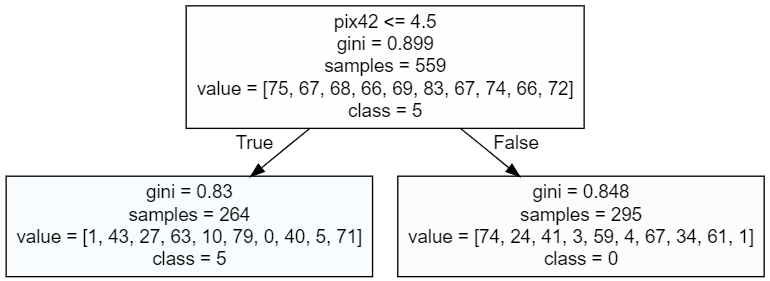

In [78]:
from IPython import display
display.Image("./digits_tree3.png", width=500)  # adjust for your tree!

In [64]:
#
# So, to compare different parameters, let's use cv
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

best_d = 1         # range(1,6)
best_ntrees = 50   # [50,150,250]
best_accuracy = 0

for d in range(1,11):
    for ntrees in [50,150,250]:
        rforest_model = ensemble.RandomForestClassifier(max_depth=d, 
                                                        n_estimators=ntrees,
                                                        max_samples=0.5)
        cv_scores = cross_val_score( rforest_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
        average_cv_accuracy = cv_scores.mean()  # more likely, only their average
        print(f"depth: {d:2d} ntrees: {ntrees:3d} cv accuracy: {average_cv_accuracy:7.4f}")
        if average_cv_accuracy > best_accuracy:
            best_accuracy = average_cv_accuracy
            best_d = d
            best_ntrees = ntrees

best_depth = best_d   
best_num_trees = best_ntrees

# This will be incorrect when initially run:
print()
print(f"best_depth: {best_depth} and best_num_trees: {best_num_trees} are our choices. Acc: {best_accuracy}")  

depth:  1 ntrees:  50 cv accuracy:  0.6528
depth:  1 ntrees: 150 cv accuracy:  0.6464
depth:  1 ntrees: 250 cv accuracy:  0.6775
depth:  2 ntrees:  50 cv accuracy:  0.8154
depth:  2 ntrees: 150 cv accuracy:  0.8437
depth:  2 ntrees: 250 cv accuracy:  0.8359
depth:  3 ntrees:  50 cv accuracy:  0.8699
depth:  3 ntrees: 150 cv accuracy:  0.8847
depth:  3 ntrees: 250 cv accuracy:  0.8784
depth:  4 ntrees:  50 cv accuracy:  0.9017
depth:  4 ntrees: 150 cv accuracy:  0.9201
depth:  4 ntrees: 250 cv accuracy:  0.9201
depth:  5 ntrees:  50 cv accuracy:  0.9307
depth:  5 ntrees: 150 cv accuracy:  0.9364
depth:  5 ntrees: 250 cv accuracy:  0.9399
depth:  6 ntrees:  50 cv accuracy:  0.9462
depth:  6 ntrees: 150 cv accuracy:  0.9519
depth:  6 ntrees: 250 cv accuracy:  0.9547
depth:  7 ntrees:  50 cv accuracy:  0.9526
depth:  7 ntrees: 150 cv accuracy:  0.9583
depth:  7 ntrees: 250 cv accuracy:  0.9618
depth:  8 ntrees:  50 cv accuracy:  0.9604
depth:  8 ntrees: 150 cv accuracy:  0.9675
depth:  8 n

In [65]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests
best_depth = best_depth
best_num_trees = best_num_trees
# we should have best_depth and best_num_trees
rforest_model_tuned = ensemble.RandomForestClassifier(max_depth=best_depth, 
                                                      n_estimators=best_num_trees,
                                                      max_samples=0.5)

# we train the model (it's one line!)
rforest_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}") 

Built an RF classifier with depth=10 and ntrees=150


In [66]:
#
# +++ This is our "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [1. 0. 0. 7. 3. 5. 2. 5. 3. 3. 5. 5. 2. 5. 2. 7. 1. 2. 0. 9. 0. 5. 0. 4.
 5. 1. 6. 1. 2. 8. 6. 6. 8. 9. 0. 5. 7. 2. 0. 5. 9. 3. 6. 9. 2. 9. 7. 3.
 5. 5. 1. 2. 6. 5. 8. 9. 3. 7. 8. 5. 8. 7. 1. 8. 3. 5. 1. 9. 0. 4. 4. 8.
 2. 7. 4. 2. 5. 1. 9. 0. 9. 3. 4. 5. 2. 2. 4. 9. 1. 6. 8. 0. 7. 0. 2. 7.
 6. 9. 6. 6. 1. 0. 1. 2. 7. 6. 7. 9. 6. 6. 7. 5. 2. 4. 9. 3. 3. 4. 2. 1.
 9. 8. 2. 3. 1. 9. 9. 6. 9. 2. 9. 3. 8. 4. 0. 1. 8. 2. 2. 9. 6. 5. 6. 4.
 5. 9. 9. 6. 0. 7. 0. 6. 9. 2. 1. 2. 9. 4. 5. 7. 5. 1. 8. 5. 7. 0. 7. 8.
 8. 1. 0. 6. 8. 4. 2. 4. 7. 3. 6. 2. 5. 5. 5. 3. 2. 2. 8. 5. 4. 7. 5. 1.
 9. 4. 6. 3. 0. 3. 0. 3. 5. 2. 6. 7. 9. 3. 2. 6. 2. 0. 2. 6. 8. 8. 7. 9.
 3. 6. 8. 0. 1. 7. 8. 1. 4. 0. 8. 5. 6. 4. 2. 6. 0. 5. 9. 6. 0. 1. 7. 1.
 5. 2. 2. 2. 9. 5. 6. 5. 7. 2. 5. 5. 3. 5. 5. 6. 3. 5. 7. 9. 8. 0. 7. 1.
 2. 8. 3. 8. 9. 2. 6. 8. 7. 0. 2. 9. 9. 4. 0. 9. 3. 0. 8. 8. 7. 9. 6. 4.
 0. 6. 8. 0. 0. 8. 7. 1. 8. 3. 8. 6. 5. 6. 4. 2. 7. 1. 1. 9. 2. 8. 7. 7.
 7. 1. 6. 1. 3. 5. 0. 1. 2. 8. 1.

342

In [67]:
#
# Ok!  We have tuned our RF to use the "best" parameters
#
# Now, we use ALL available data to train our final predictive model:
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

# we should have best_depth and best_num_trees
rforest_model_final = ensemble.RandomForestClassifier(max_depth=best_depth, 
                                                      n_estimators=best_num_trees,
                                                      max_samples=0.5)

# we train the model (it's one line!)
rforest_model_final.fit(X_all, y_all)              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}") 

Built an RF classifier with depth=10 and ntrees=150


In [68]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features ):
    """ input: a list of two features 
                [ month, day ]
        output: the predicted births that are either above(1) or below(0) the median
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = rforest_model_final.predict(our_features)
    
    predicted_species = int(round(predicted_species[0]))  # unpack one element
    name = DIGITS[predicted_species]
    return f"{name} ({predicted_species})"
    
#
# Try it!
# 
# Features = eval(input("Enter new Features: "))
#
Features = [0,0,0,5,14,12,2,0,0,0,7,15,8,14,4,0,0,0,6,2,3,13,1,0,0,0,0,1,13,4,0,0,0,0,1,11,9,0,0,0,0,8,16,13,0,0,0,0,0,5,14,16,11,2,0,0,0,0,0,6,12,13,3,0]   # [4.8,2.7,3.1,0.2] [4.6,3.1,2.0,1.5] [6.7,3.3,5.7,2.1]
result = predictive_model( Features )
print(f"I predict {result} from Features {Features}")

I predict 2 (2) from Features [0, 0, 0, 5, 14, 12, 2, 0, 0, 0, 7, 15, 8, 14, 4, 0, 0, 0, 6, 2, 3, 13, 1, 0, 0, 0, 0, 1, 13, 4, 0, 0, 0, 0, 1, 11, 9, 0, 0, 0, 0, 8, 16, 13, 0, 0, 0, 0, 0, 5, 14, 16, 11, 2, 0, 0, 0, 0, 0, 6, 12, 13, 3, 0]


In [69]:
#
# try it on new, "unseen" data!
#

LoD = [[0,0,0,8,14,0,0,0,0,0,5,16,11,0,0,0,0,1,15,14,1,6,0,0,0,7,16,5,3,16,8,0,0,8,16,8,14,16,2,0,0,0,6,14,16,11,0,0,0,0,0,6,16,4,0,0,0,0,0,10,15,0,0,0],
[0,0,0,5,14,12,2,0,0,0,7,15,8,14,4,0,0,0,6,2,3,13,1,0,0,0,0,1,13,4,0,0,0,0,1,11,9,0,0,0,0,8,16,13,0,0,0,0,0,5,14,16,11,2,0,0,0,0,0,6,12,13,3,0],
[0,0,0,3,16,3,0,0,0,0,0,12,16,2,0,0,0,0,8,16,16,4,0,0,0,7,16,15,16,12,11,0,0,8,16,16,16,13,3,0,0,0,0,7,14,1,0,0,0,0,0,6,16,0,0,0,0,0,0,4,14,0,0,0],
[0,0,0,3,15,10,1,0,0,0,0,11,10,16,4,0,0,0,0,12,1,15,6,0,0,0,0,3,4,15,4,0,0,0,0,6,15,6,0,0,0,4,15,16,9,0,0,0,0,0,13,16,15,9,3,0,0,0,0,4,9,14,7,0],
[0,0,0,3,16,3,0,0,0,0,0,10,16,11,0,0,0,0,4,16,16,8,0,0,0,2,14,12,16,5,0,0,0,10,16,14,16,16,11,0,0,5,12,13,16,8,3,0,0,0,0,2,15,3,0,0,0,0,0,4,12,0,0,0],
[0,0,7,15,15,4,0,0,0,8,16,16,16,4,0,0,0,8,15,8,16,4,0,0,0,0,0,10,15,0,0,0,0,0,1,15,9,0,0,0,0,0,6,16,2,0,0,0,0,0,8,16,8,11,9,0,0,0,9,16,16,12,3,0]]
      
for Features in LoD:
    result = predictive_model( Features )
    print(f"I predict {result} from Features {Features}")

# these flowers' coded species: 012001122

I predict 4 (4) from Features [0, 0, 0, 8, 14, 0, 0, 0, 0, 0, 5, 16, 11, 0, 0, 0, 0, 1, 15, 14, 1, 6, 0, 0, 0, 7, 16, 5, 3, 16, 8, 0, 0, 8, 16, 8, 14, 16, 2, 0, 0, 0, 6, 14, 16, 11, 0, 0, 0, 0, 0, 6, 16, 4, 0, 0, 0, 0, 0, 10, 15, 0, 0, 0]
I predict 2 (2) from Features [0, 0, 0, 5, 14, 12, 2, 0, 0, 0, 7, 15, 8, 14, 4, 0, 0, 0, 6, 2, 3, 13, 1, 0, 0, 0, 0, 1, 13, 4, 0, 0, 0, 0, 1, 11, 9, 0, 0, 0, 0, 8, 16, 13, 0, 0, 0, 0, 0, 5, 14, 16, 11, 2, 0, 0, 0, 0, 0, 6, 12, 13, 3, 0]
I predict 4 (4) from Features [0, 0, 0, 3, 16, 3, 0, 0, 0, 0, 0, 12, 16, 2, 0, 0, 0, 0, 8, 16, 16, 4, 0, 0, 0, 7, 16, 15, 16, 12, 11, 0, 0, 8, 16, 16, 16, 13, 3, 0, 0, 0, 0, 7, 14, 1, 0, 0, 0, 0, 0, 6, 16, 0, 0, 0, 0, 0, 0, 4, 14, 0, 0, 0]
I predict 2 (2) from Features [0, 0, 0, 3, 15, 10, 1, 0, 0, 0, 0, 11, 10, 16, 4, 0, 0, 0, 0, 12, 1, 15, 6, 0, 0, 0, 0, 3, 4, 15, 4, 0, 0, 0, 0, 6, 15, 6, 0, 0, 0, 4, 15, 16, 9, 0, 0, 0, 0, 0, 13, 16, 15, 9, 3, 0, 0, 0, 0, 4, 9, 14, 7, 0]
I predict 4 (4) from Features [0, 0, 0, 3, 16,

In [70]:
#
# feature importances are often even more "important" than predictions...
#
#    Random forests can provide a much "smoother" measure of feature importance, since
#                   they integrate over so many individual models (each tree)
#
#    That is, it's much less likely that a feature will have 0% importance, unless it never varies
#

print(rforest_model_final.feature_importances_)
print()

# let's see them with each feature name:
IMPs = rforest_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.00000000e+00 2.05245939e-03 1.99609333e-02 1.00733940e-02
 9.76945613e-03 2.22062920e-02 8.47693153e-03 8.34322080e-04
 8.97511471e-05 1.26836456e-02 2.71953900e-02 6.09673735e-03
 1.71884848e-02 2.74148749e-02 5.15471777e-03 3.56691404e-04
 1.69835982e-05 8.60964733e-03 1.92624258e-02 2.54395530e-02
 3.18423372e-02 5.38671402e-02 9.17340137e-03 2.60582700e-04
 2.38634887e-05 1.35801784e-02 4.30093408e-02 2.50819224e-02
 2.80281467e-02 2.27890654e-02 3.13573528e-02 5.28493876e-05
 0.00000000e+00 3.58424117e-02 2.69808958e-02 1.51005233e-02
 4.17609375e-02 1.78245462e-02 2.60267696e-02 0.00000000e+00
 1.27127251e-04 9.19114939e-03 3.28402964e-02 4.15344191e-02
 2.00363622e-02 1.84790557e-02 2.21460643e-02 1.22705663e-04
 6.40928742e-05 2.64581534e-03 1.63727286e-02 1.66985059e-02
 1.34319130e-02 2.61595140e-02 2.09809633e-02 1.97472609e-03
 3.19061726e-05 1.99287158e-03 2.13029151e-02 1.08580236e-02
 2.90361759e-02 2.79356521e-02 1.76528901e-02 2.89917019e-03]

Feature         pix0 h

<br>

#### _Visualizing_ pixel-importance:
+ visualize a heat map of how relatively-important each of the 64 pixels is in our final RF
+ this will be a "low-res image" similar to the digits, but it won't itself be a digit -- it will show how much each of the 64 spots in the 8x8 grid contribute in classifying each digit...

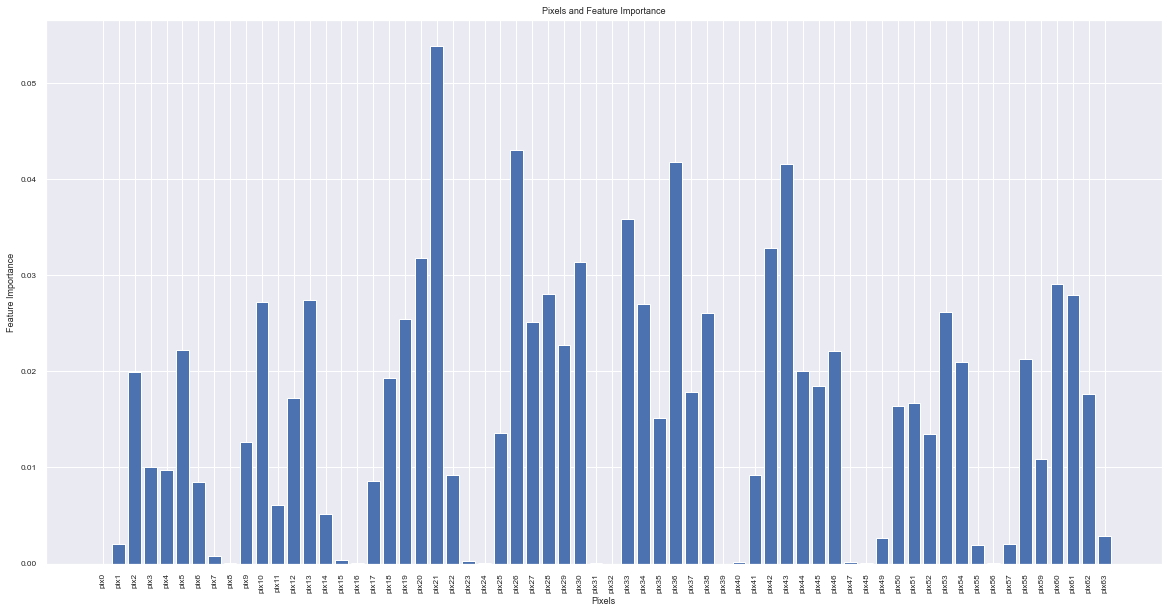

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

pixels = []
for i in range(len(COLUMNS)-1):
    pixels.append(COLUMNS[i])
f_importance = list(rforest_model_final.feature_importances_)

plt.figure(figsize=(20,10))
sns.set_theme(font_scale=0.75)
plt.bar(pixels,f_importance)
plt.title('Pixels and Feature Importance')
plt.xlabel('Pixels')
plt.ylabel('Feature Importance')
plt.grid(True)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()